In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
pd.read_csv("../../results/improved-tamaraw/conn~single/defence~tamaraw/classifier~kfp/feature-importances.csv", index_col="feature", squeeze=True).sort_values(ascending=False).head(20)

feature
size-stats::in::std               0.026823
size-stats::in::var               0.026412
size-stats::overall::var          0.022596
size-stats::overall::std          0.021789
concentration-stats::std::out     0.020606
size-stats::in::mean              0.020413
total-size::in                    0.019090
total-size::overall               0.015985
alt-pps::0                        0.015223
time::in::percentile-25           0.012447
size-stats::overall::mean         0.012421
alt-conc::0                       0.011661
first-30::packet-counts::out      0.011515
alt-pps::1                        0.011513
conc::1                           0.011459
fraction-incoming                 0.011425
interarrival::out::std            0.011396
first-30::packet-counts::in       0.011207
concentration-stats::mean::out    0.011108
fraction-outgoing                 0.011011
Name: weight, dtype: float64

,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[156, -100, 104, 104, -136, -120, 1432, -1432,...",498428,498428,632.805751,-1432
1,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",500700,500700,635.172147,-1432
2,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",497620,497620,634.345012,-1432
3,0,"[104, 104, -136, -120, 1432, -1432, -1432, -14...",498936,498936,634.184673,-1432
4,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",499844,499844,632.664241,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -168, -136, 1432, 1432, ...",28155900,28155900,460.227459,-1272
496,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",27829252,27829252,478.043421,-1272
497,9,"[156, -100, 104, 104, -168, -136, 1432, 1432, ...",28043660,28043660,465.309445,-1272
498,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",28742852,28742852,470.949180,-1272


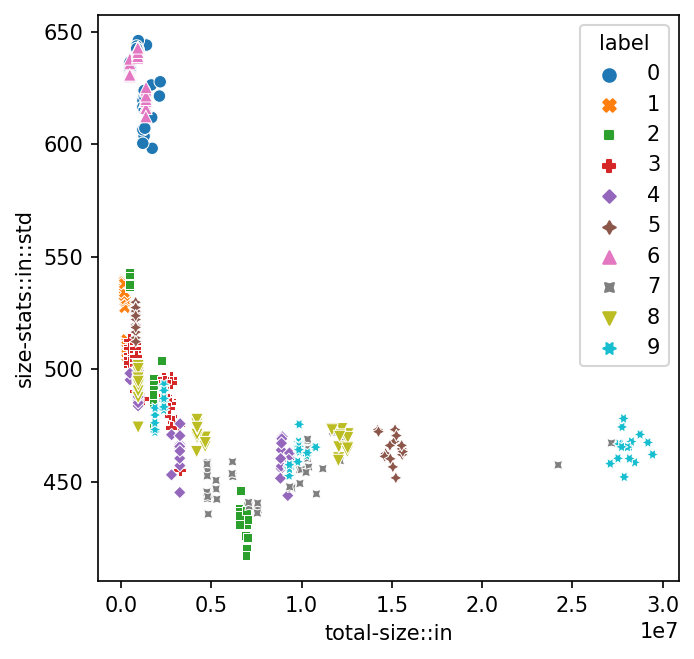

In [8]:
def scatterplot(filename):
    with h5py.File(filename) as h5in:
    # with h5py.File("../../results-on-drive/ml-eval-conn/defence~tamaraw/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "label": h5in["labels"]["class"][:],
            "sizes": h5in["sizes"][:]
        })

    frame

    def total_in(sizes):
        return np.abs(sizes[sizes < 0]).sum()

    def in_std(sizes):
        return np.std(np.abs(sizes[sizes < 0]))
    
    def max_in(sizes):
        return np.min(sizes)

    frame["total-size::in"] = frame["sizes"].apply(total_in)
    frame["size:::"] = frame["sizes"].apply(total_in)
    frame["size-stats::in::std"] = frame["sizes"].apply(in_std)
    frame["min"] = frame["sizes"].apply(max_in)
    display(frame)

    plot_data = frame[(frame["label"] >= 0) & (frame["label"] < 15)].copy()
    plot_data["label"] = plot_data["label"].astype(str)

    fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
    sns.scatterplot(x="total-size::in", y="size-stats::in::std", data=plot_data, hue="label", style="label")
    return frame

frame = scatterplot("../../results/tamaraw-debug/higher_pkt_size/10x50+0/dataset.h5")

In [9]:
frame.groupby("label")["min"].min()

label
0   -1432
1   -1432
2   -1304
3   -1272
4   -1272
5   -1272
6   -1432
7   -1272
8   -1272
9   -1272
Name: min, dtype: int64

,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,-1,"[104, 104, -136, -168, 1432, 1432, -1272, -127...",957384,957384,388.640885,-1272
1,-1,"[120, 120, -168, -200, 1432, 1432, -1272, -127...",999784,999784,415.233557,-1272
2,-1,"[104, 104, -200, -152, 1432, -1272, -1272, -12...",4266720,4266720,404.871541,-1272
3,-1,"[104, 104, -168, -136, 1432, 1432, -1272, -127...",10065656,10065656,381.575592,-1272
4,-1,"[104, 104, -136, -168, 1432, 1432, -1272, 1432...",1187968,1187968,469.152134,-1272
...,...,...,...,...,...,...
10995,99,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",10435908,10435908,478.189356,-1272
10996,99,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",10710492,10710492,473.547260,-1272
10997,99,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",10096996,10096996,476.553316,-1272
10998,99,"[156, -100, 104, 104, -168, -136, 1432, 1432, ...",11139252,11139252,477.593944,-1272


label
-1    -1352
 0    -1352
 1    -1352
 2    -1304
 3    -1272
       ... 
 95   -1272
 96   -1272
 97   -1272
 98   -1272
 99   -1272
Name: min, Length: 101, dtype: int64

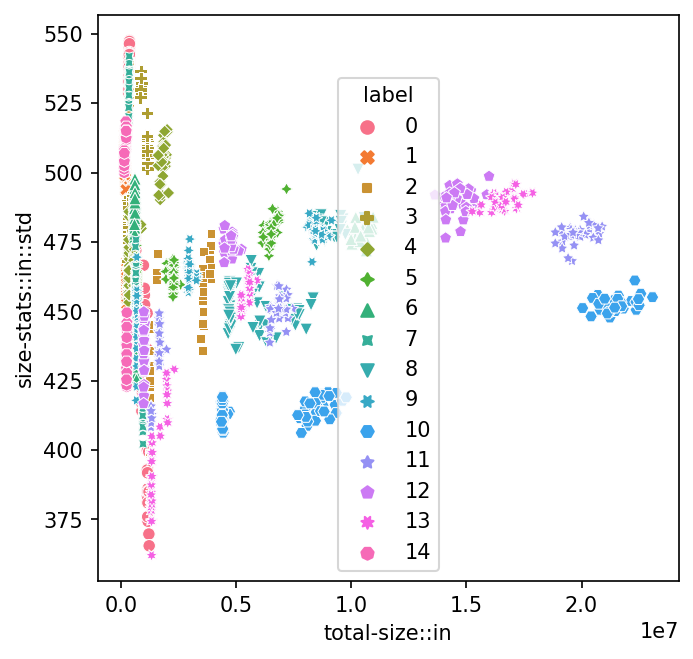

In [11]:
def plot_packet_sizes()


frame = scatterplot("../../results/improved-tamaraw/conn~single/defence~tamaraw/dataset.h5")
frame.groupby("label")["min"].min()

In [3]:
frame.groupby("label")["min"].min()

label
0   -1432
1   -1432
2   -1304
3   -1272
4   -1272
5   -1272
6   -1432
7   -1272
8   -1272
9   -1272
Name: min, dtype: int64

,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",426764,426764,598.793374,-1432
1,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",427060,427060,598.796469,-1432
2,0,"[104, 104, 156, -100, 40, -120, -136, 1432, -1...",427204,427204,600.581780,-1432
3,0,"[104, 104, 156, -100, 40, -136, -120, 1432, -1...",426340,426340,598.955842,-1432
4,0,"[156, -100, 104, 104, -136, -120, 1432, -1432,...",426316,426316,599.659306,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -152, -136, 1432, 1432, ...",19720772,19720772,533.823189,-1272
496,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",20121764,20121764,536.211658,-1272
497,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",19342188,19342188,523.286446,-1272
498,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",21338612,21338612,543.059118,-1272


,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",426764,426764,598.793374,-1432
1,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",427060,427060,598.796469,-1432
2,0,"[104, 104, 156, -100, 40, -120, -136, 1432, -1...",427204,427204,600.581780,-1432
3,0,"[104, 104, 156, -100, 40, -136, -120, 1432, -1...",426340,426340,598.955842,-1432
4,0,"[156, -100, 104, 104, -136, -120, 1432, -1432,...",426316,426316,599.659306,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -152, -136, 1432, 1432, ...",19720772,19720772,533.823189,-1272
496,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",20121764,20121764,536.211658,-1272
497,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",19342188,19342188,523.286446,-1272
498,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",21338612,21338612,543.059118,-1272


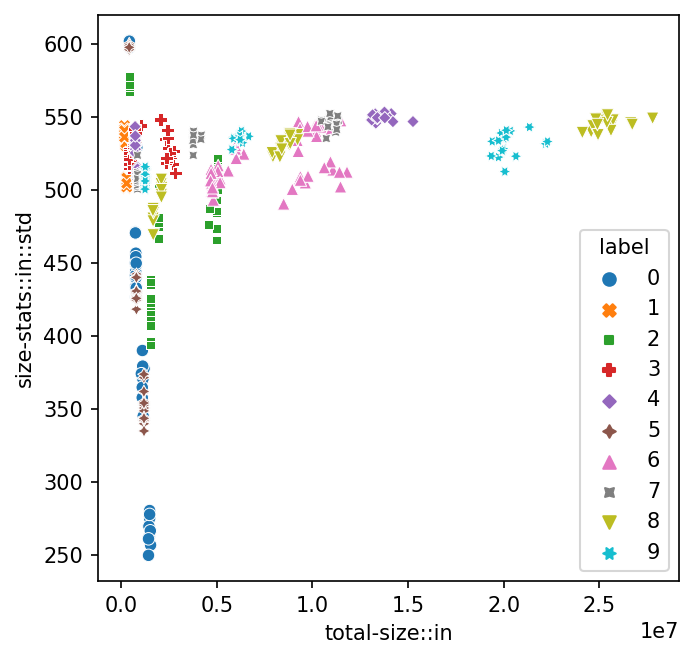

In [4]:
scatterplot("../../results/tamaraw-debug-10x50/msd-excess~1500/dataset.h5")

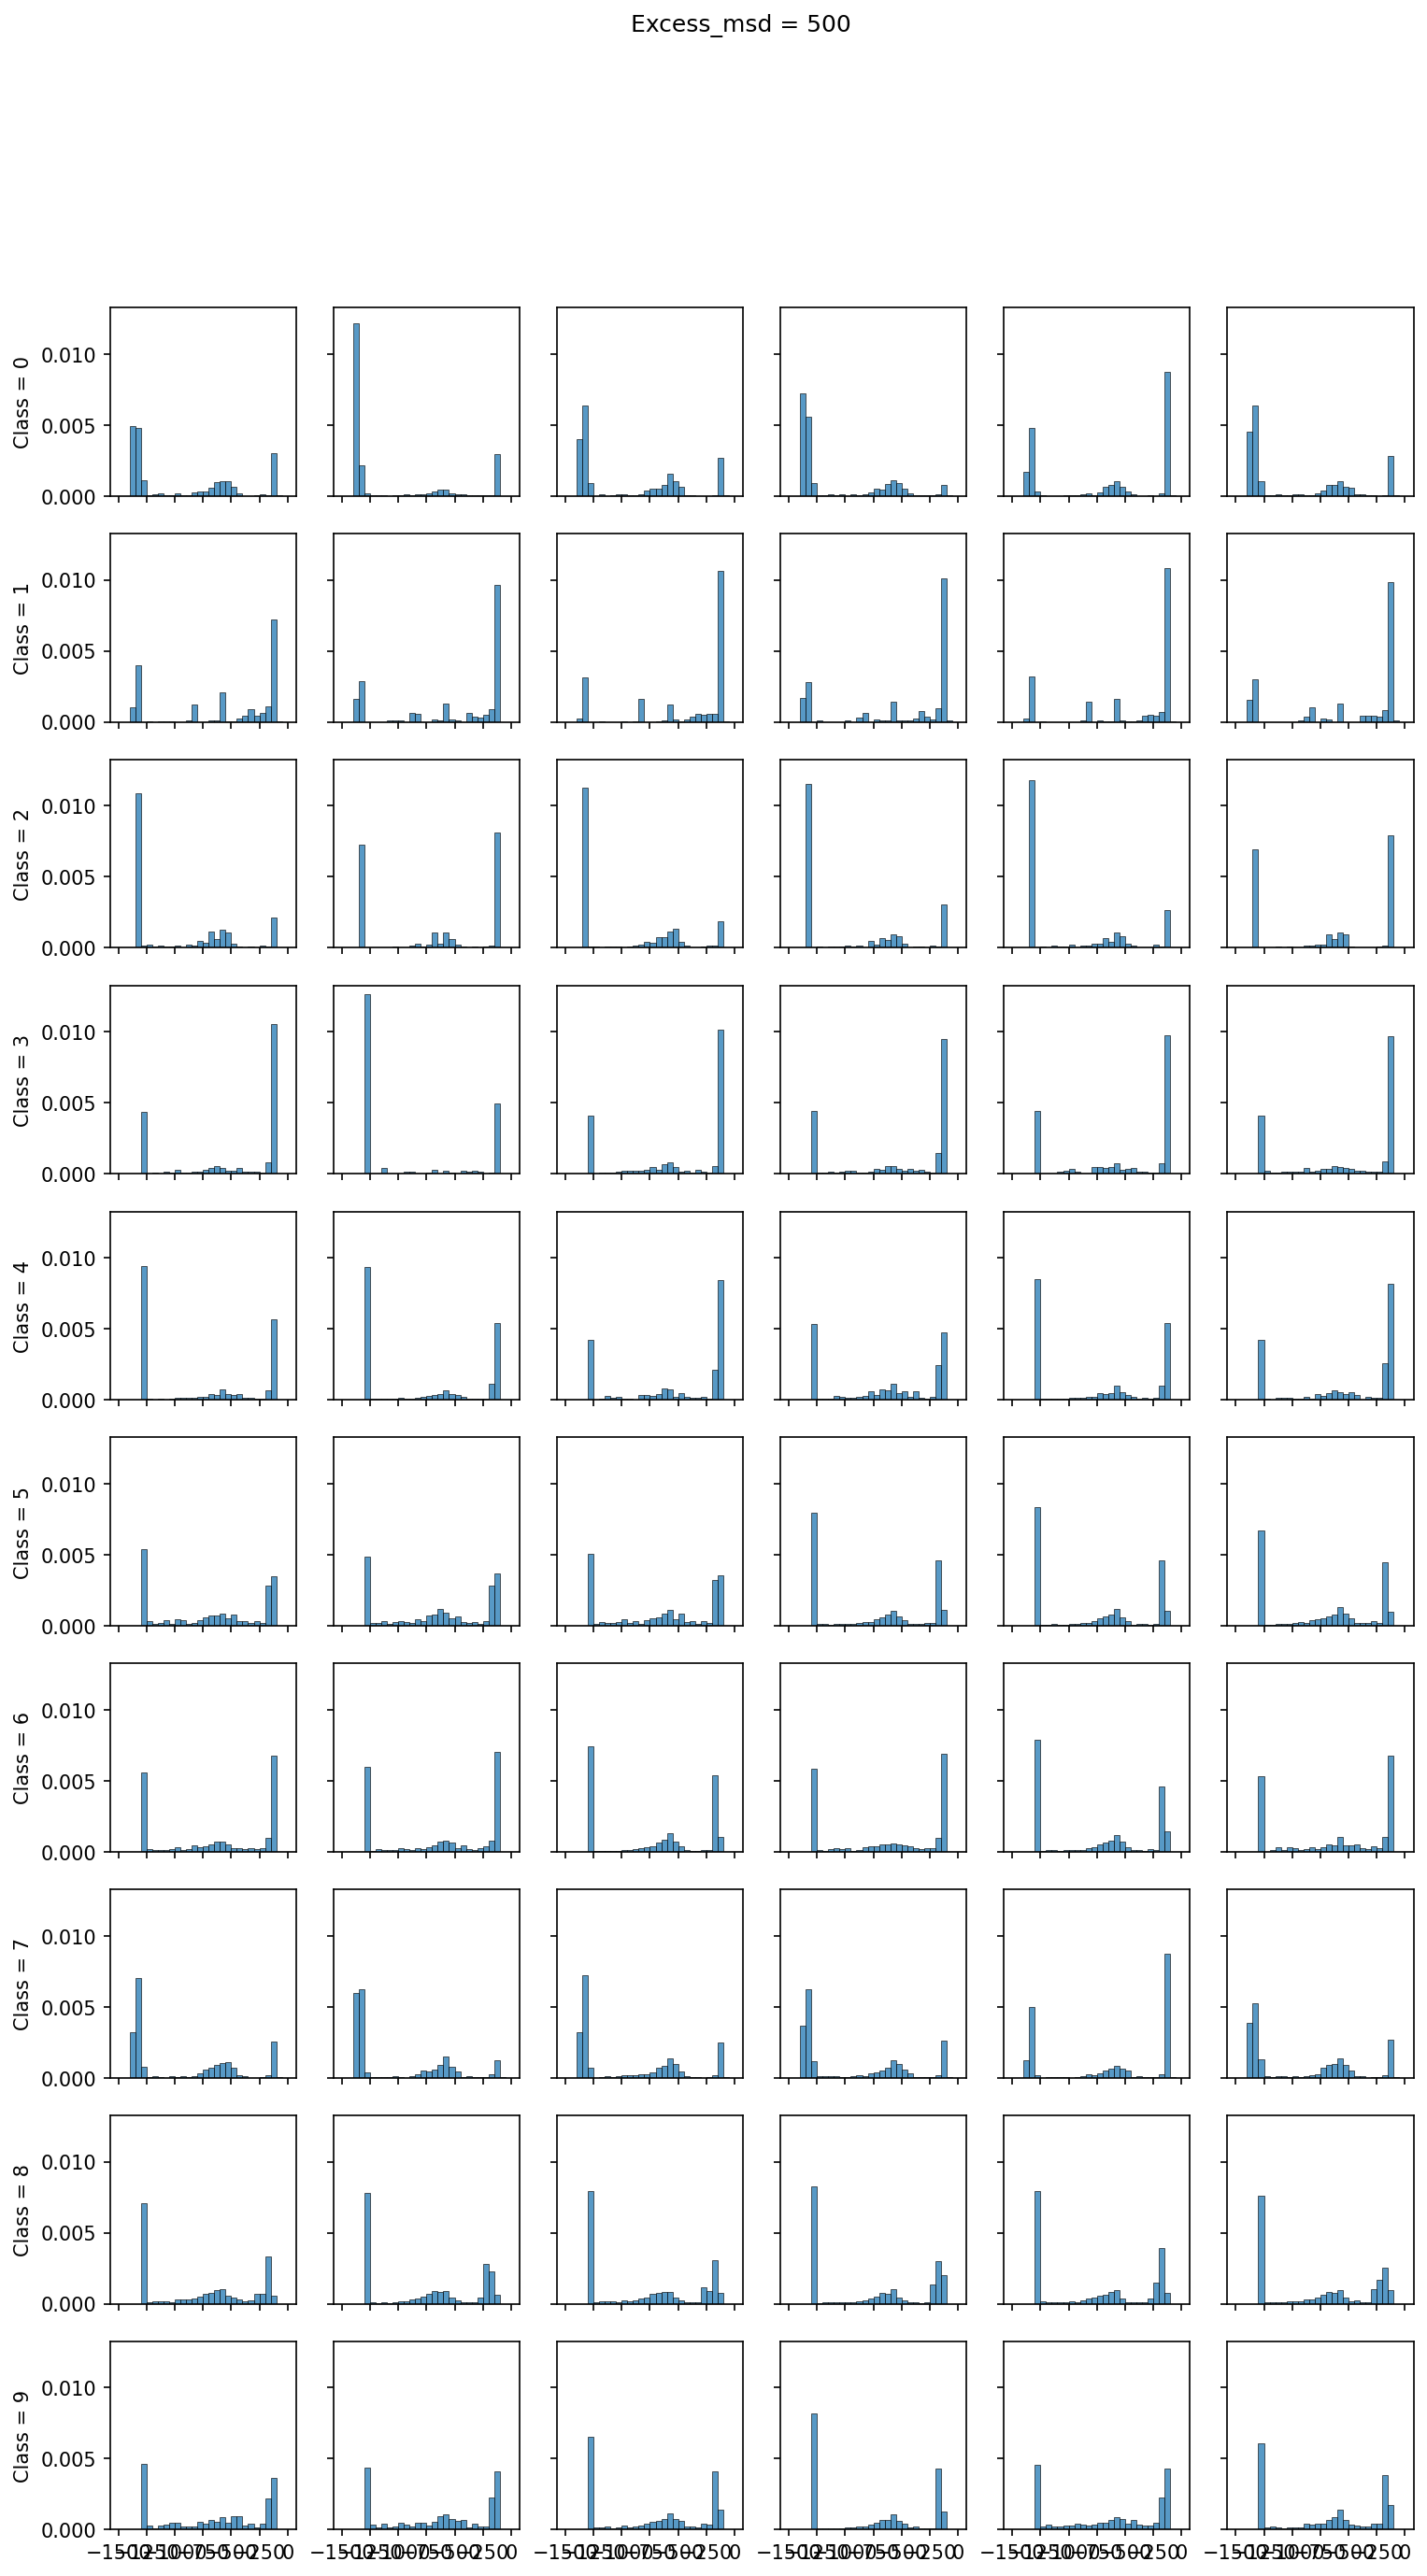

In [9]:
def plot_hist(excess, seed=0):
    with h5py.File(f"../../results/improved-tamaraw/conn~single/defence~tamaraw/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "labels": np.asarray(h5in["labels"]["class"]),
            "sizes": np.asarray(h5in["sizes"])
        })
    plot_frame = frame.groupby("labels").sample(n=6, random_state=seed)
    plot_frame = plot_frame.query("labels >= 0 and labels < 10")

    fig, axes_grid = plt.subplots(10, 6, figsize=(12, 21), dpi=150, sharex=True, sharey=True)
    fig.suptitle(f"Excess_msd = {excess}")
    for row, (label, data) in enumerate(plot_frame.groupby("labels")):
        axes_row = axes_grid[row, :]
        axes_row[0].set_ylabel(f"Class = {label}")
        for size_data, ax in zip(data["sizes"], axes_row):
            ax.set_xticks(list(range(0, -1600, -250)))
            sns.histplot(size_data, binrange=(-1500, 0), bins=30, ax=ax, stat="density")

plot_hist(500, seed=1)
# for i, ax in zip([0, 100, 200, 300, 401, 500, 600, 700, 800, 900], axes):
#     sns.histplot(sizes[i], binrange=(-1500, 0), ax=ax,stat="density")
#     ax.set_title(i)

NameError: name 'axes_grid' is not defined

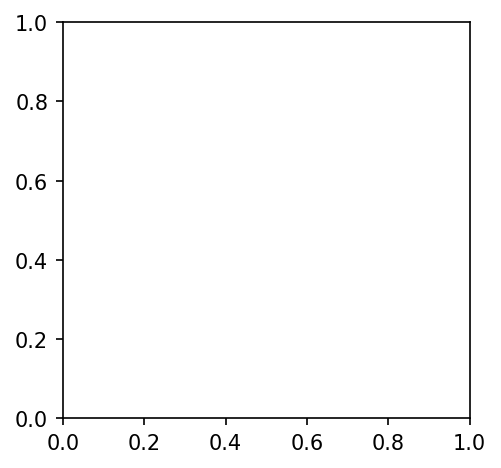

In [9]:
def plot_hist2(excess, seed=0):
    with h5py.File(f"../../results/tamaraw-debug-10x50/msd-excess~{excess}/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "labels": np.asarray(h5in["labels"]["class"]),
            "sizes": np.asarray(h5in["sizes"])
        })
    plot_frame = frame.groupby("labels").sample(n=4, random_state=seed)

    fig, axes = plt.subplots(1, 1, figsize=(3.5, 3.5), dpi=150, sharex=True, sharey=True)
    for row, (label, data) in enumerate(plot_frame.groupby("labels")):
        axes_row = axes_grid[row, :]
        axes_row[0].set_ylabel(f"Class = {label}")
        for size_data, ax in zip(data["sizes"], axes_row):
            ax.set_xticks(list(range(0, -1600, -250)))
            sns.histplot(size_data, binrange=(-1500, 0), bins=30, ax=ax, stat="density")

plot_hist2(1500, seed=1)
# for i, ax in zip([0, 100, 200, 300, 401, 500, 600, 700, 800, 900], axes):
#     sns.histplot(sizes[i], binrange=(-1500, 0), ax=ax,stat="density")
#     ax.set_title(i)

In [ ]:
plot_hist(100, seed=3)

In [ ]:
plot_hist(1500, seed=2)